In [44]:
from analysis import *
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

In [45]:
SIM_NAME = "one_node_regions_30m"
nodes = []

for filename in os.listdir(os.fsencode(f'dumps/{SIM_NAME}')):
    filename = filename.decode("utf-8")
    with open(f'dumps/{SIM_NAME}/{filename}', 'rb') as f:
        nodes.append(pickle.load(f))
        
print(f'Loaded {len(nodes)} nodes.')
print(f'{nodes[0].timestamp} simulation steps.')

Loaded 9 nodes.
29999999 simulation steps.


In [46]:
blocks = get_all_blocks(nodes)
print(f'{len(blocks)} blocks in total.')

5048 blocks in total.


In [51]:
stale_rates = [stale_block_rate(node) for node in nodes]
print(f'Stale block rate: {round(np.mean(stale_rates), 5)}')

Stale block rate: 0.00139


In [48]:
block_ints = [avg_block_interval(node) for node in nodes]
print(f'Average block interval: {np.mean(block_ints)} iters')

Average block interval: 5949.571400238001 iters


In [53]:
delays_50 = [block_percentile_delay(block, nodes, 0.5) for id, block in blocks.items()]
delays_90 = [block_percentile_delay(block, nodes, 0.9) for id, block in blocks.items()]
print(f'50% delay: {round(np.mean(delays_50), 2)} iters')
print(f'90% delay: {round(np.mean(delays_90), 2)} iters')

50% delay: 21.81 iters
90% delay: 33.87 iters


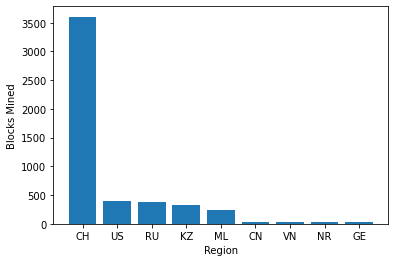

CH 71.39 %
US 7.75 %
RU 7.43 %
KZ 6.56 %
ML 4.73 %
CN 0.65 %
VN 0.55 %
NR 0.48 %
GE 0.46 %


In [54]:
mine_regions = [block.miner.region.name for id, block in blocks.items()]
REGIONS = set(mine_regions)
region_counts = dict()

for region in REGIONS:
    region_counts[region] = mine_regions.count(region)

sorted_counts = dict(sorted(region_counts.items(), key=lambda item: item[1], reverse=True))

plt.bar(sorted_counts.keys(), sorted_counts.values())
plt.xlabel('Region')
plt.ylabel('Blocks Mined')
plt.show()

for region, count in sorted_counts.items():
    print(region, round(100*count / sum(sorted_counts.values()), 2), '%')

In [56]:
for node in nodes:
    print(node.name, len(node.ins))

MINER_KZ_0 5
MINER_CN_0 4
MINER_ML_0 3
MINER_GE_0 6
MINER_RU_0 5
MINER_VN_0 4
MINER_US_0 5
MINER_CH_0 4
MINER_NR_0 4
